https://nbviewer.org/github/JetBrains/lets-plot-kotlin/blob/master/docs/examples/jupyter-notebooks/algebraic_curve.ipynb

In [1]:
%use kandy(0.5.0-rc-1)

In [2]:
fun linspace(start: Double, stop: Double, num: Int): List<Double> {
    return List(num) { i -> start + i * ((stop - start) / (num - 1)) }
}

In [3]:
fun F(x: Double, y: Double, a: Double = 0.0, b: Double = 0.0): Double {
    return y.pow(2) - x.pow(3) - a * x - b
}

fun level(z: Double, c: Double = 1.0): Double {
    return exp(-c * abs(z))
}

In [4]:
val n = 300
val a = -1.0
val b = 0.0
val xRange = linspace(-3.0, 3.0, n + 1)
val yRange = linspace(-3.0, 3.0, n + 1)
val zippedData = xRange.map { x ->
    yRange.map { y -> Triple(x, y, level(F(x, y, a = a, b = b), c = 10.0)) }
}.flatten()
val data = mapOf(
    "x" to zippedData.map { it.first },
    "y" to zippedData.map { it.second },
    "z" to zippedData.map { it.third },
)


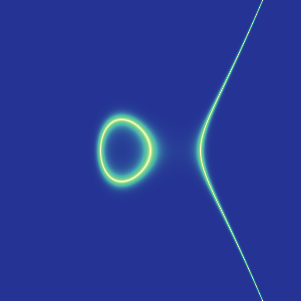

In [5]:
plot(data) {
    raster {
        x("x"<Double>())
        y("y"<Double>())
        fillColor("z"<Double>()) {
            scale = continuous(range = Color.hex("#253494")..Color.hex("#ffffcc"))
            legend.type = LegendType.None
        }
    }

    layout {
        title = "Elliptic curve with a = $a, b = $b"
        subtitle = "Simple way to draw an algebraic curve - with `raster` layer"
        size = 800 to 600

        theme(Theme.Classic) {
            blankAxes()
        }
    }
}